In [18]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

In [133]:
from selenium import webdriver
driver = webdriver.Chrome('D:\play_with_data\chromedriver.exe')
word = "제주"
url = insta_searching(word) 
driver.get(url)

C:\Users\lullu\AppData\Local\Temp\ipykernel_50988\1031486552.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:\play_with_data\chromedriver.exe')


In [119]:
import time
from selenium.webdriver.common.by import By

In [120]:
word = "제주놀거리"
url = insta_searching(word) 
driver.get(url)

In [121]:
# 첫 번째 게시글 찾아 클릭하여 열어보기
# selenium만 쓰는 경우, 띄워놓고 그 안에서 서칭

def select_first(driver):
    first = driver.find_element(By.CLASS_NAME ,'_aagu')
    first.click()
    time.sleep(3) #3초간 대기 처리
    
select_first(driver)

In [122]:
import re
from bs4 import BeautifulSoup #beautifulsoup를 사용
def get_content(driver) :
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    tags = re.findall(r'#[^\s#,\\]+', content) # #[^\s#,\\] => 정규식
    date = soup.select('time._aaqe')[0]['datetime'][:10] # 슬라이싱해서 10개
# 좋아요 수 가져오기
    try:
        like = soup.select('div._aacl._aaco._aacw._aacx._aada._aade > span')[0].text[4:-1]
    except:
        like = 0
        
# 위치정보 가져오기
    try: 

        place = soup.select('div.__aaqm')[0].text
    except:
        place = ''
        
# 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)


['제주민속촌 제대로 즐기기 꿀팁✨넓디 넓은 제주민속촌에서 스팟만 쏙쏙 골라 인생사진 남기고 싶다면? 이것만 보고 따라해보세요💖 가족, 연인, 사랑하는 반려견과 함께 제주민속촌에서 제대로 추억 남겨보세요📷🧡💛🎇제주민속촌 조선날라리전- 공연안내 : 연중무휴 상시 공연- 매일 3회차 제주영문 앞에서 공연이 펼쳐져요.(공연시간 11:00 / 14:00 / 16:00)- 코믹한 연기와 댄스 라이브 퍼레이드☔우천시 공연이 취소됩니다.☑️제주민속촌◽운영시간 ㅣ 8:30~18:00(연중무휴)◽서귀포시 표선면 민속해안로 631-34◽애견동반 가능(소형견 리드줄 착용 또는 이동장)#조선날라리전 #제주민속촌',
 '2023-02-17',
 '',
 '',
 ['#조선날라리전', '#제주민속촌']]

In [125]:
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME,'_aaqg')

    right.click()
    time.sleep(3)
    
move_next(driver)


In [127]:
# 여러 게시물 수집하기
results = []
target = 10000 # 크롤링할 게시글 수
for i in range(target):
    try:
        data = get_content(driver) # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2) # 2초 대기 후, 다음 게시글
        move_next(driver) 
        
print(results[:2])


[['🥄 "제주도민이 육지사람에게 알려준 맛집" 🥄제주도민이 알려주는 맛집들 좀 알려주러 왔지~다양한 취향들을 가져와봤어! 😉우리 여행 루트에 껴서 가면 더 좋겠다 😍맛집골라서 여행 루트 짜보기~!!🤩⠀@함께 하고싶은 친구&연인 소환!!\u3000🥄깡촌흑돼지📌조천읍 함덕14길 2🥄순덕이네📌성산읍 온평서로 48🥄이춘옥원조고등어쌈밥📌애월읍 일주서로 7213🥄해성도뚜리📌애월읍 애월해안로 682🥄막둥이해녀복순이네📌성산읍 서성일로 1129🥄도토리키친📌북성로 59🥄수복강녕📌선덕로3길 40🥄우동카덴📌조천읍 교래3길 23🥄신의한모📌애월읍 하귀14길 11-1🥄경미네집📌성산읍 일출로 259🥄솔지식당📌제주 제주시 월랑로 88🥄맛나식당📌성산읍 동류암로 41#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플 #제주놀거리 #제주여행코스 #제주데이트 #제주가볼만한곳 #제주핫플레이스', '2023-02-17', '', '', ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애월맛집', '#중문맛집', '#제주공항맛집', '#서귀포맛집', '#산방산맛집', '#신제주맛집', '#제주시청맛집', '#제주애월맛집', '#월정리맛집', '#제주여행', '#제주핫플', '#제주놀거리', '#제주여행코스', '#제주데이트', '#제주가볼만한곳', '#제주핫플레이스']], ["오늘의 #수업스케치#시오빵 #녹차크림치즈쿠키 클래스 🧑🏻\u200d🍳재방문해주신 수강생님과 함께 🤎빵반죽,발효,성형-굽기까지 실습해보았어요 :) 처음엔 성형이 조금 어려웠지만 감을 금방 잡으셔서 마지막엔 너무 예쁘게 잘 나왔어요 \U0001faf6🏻크림치즈쿠키도 팁을 살려 !! 크랙,구움색 모두 잡아보았어용😀 두품목 동시에 하느라 힘드시구 어려웠을텐데 잘 따라와주셔서 너무 감사합니다 👍🏻다음주 수업때 뵐게용 그때까지 체력 열심히 비축해두세요 🥰👇🏻답례품 / 케이

In [128]:
import pandas as pd

In [129]:
# 수집데이터 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('../files/crawling_jejuMatJip2.xlsx', index = False)

In [131]:
# 여러 키워드로 검색한 결과를 저장하여 통합저장 
matzip_insta_df = pd.DataFrame( [ ] )

folder = '../files/'
f_list = ['crawling_jejuMatJip2.xlsx','crawling_jejuMatJip.xlsx','crawling_kyungjuMatJip.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    matzip_insta_df = matzip_insta_df.append(temp)
    
matzip_insta_df.columns =['content','data','like','place','tags']


C:\Users\lullu\AppData\Local\Temp\ipykernel_50988\2886195168.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matzip_insta_df = matzip_insta_df.append(temp)
C:\Users\lullu\AppData\Local\Temp\ipykernel_50988\2886195168.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matzip_insta_df = matzip_insta_df.append(temp)
C:\Users\lullu\AppData\Local\Temp\ipykernel_50988\2886195168.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matzip_insta_df = matzip_insta_df.append(temp)


In [132]:
# content 열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로 판단하고 제거
# inplace=True 옵션을 사용해 원본 데이터 변경. 꼭 필요한 옵션.(기본값은 False)
matzip_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
matzip_insta_df.to_excel('../files/crawling_jejuMatJip2.xlsx', index = False)


In [189]:
# 크롤링 결과 중 해시태그 불러오기
import pandas as pd
raw_total = pd.read_excel('../files/crawling_jeju.xlsx')
raw_total['tags'] [:3]

0    ['#제주도맛집', '#제주맛집', '#제주공항근처횟집', '#제주횟집', '#제주...
1    ['#서귀포맛집', '#제주도맛집', '#제주공항근처맛집', '#제주맛집', '#성...
2    ['#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛...
Name: tags, dtype: object

In [190]:
# 해시태그 통합저장
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("','")
    for tag in tags_list:
        tags_total.append(tag)

In [191]:
# 빈도수 집계
from collections import Counter

In [192]:
tags_total[:3]

["#제주도맛집', '#제주맛집', '#제주공항근처횟집', '#제주횟집', '#제주도횟집', '#제주시횟집', '#제주회포장', '#제주도회포장', '#제주횟집추천', '#노형동맛집', '#연동맛집', '#드림타워맛집', '#이호테우해변맛집",
 "#서귀포맛집', '#제주도맛집', '#제주공항근처맛집', '#제주맛집', '#성산일출봉맛집', '#중문맛집', '#제주중문맛집",
 "#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛집', '#제주맛집', '#제주카페', '#외도맛집', '#하귀맛집', '#한림맛집', '#한림카페', '#애월해안도로맛집', '#애월가볼만한곳', '#제주공항맛집', '#제주데이트', '#제주공항근처맛집', '#한담맛집', '#제주해안도로', '#제주맛집추천', '#제주도맛집추천', '#제주도민맛집"]

In [193]:
# Counter 함수로 그룹 내 원소의 종류별로 빈도수를 집계
tag_counts = Counter(tags_total)

#가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('', 21),
 ("#한천떡집', '#사진은', '#직접찍은사진', '#하루전', '#전화로문의", 3),
 ("#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛집', '#제주맛집', '#제주카페', '#외도맛집', '#하귀맛집', '#한림맛집', '#한림카페', '#애월해안도로맛집', '#애월가볼만한곳', '#제주공항맛집', '#제주데이트', '#제주공항근처맛집', '#한담맛집', '#제주해안도로', '#제주맛집추천', '#제주도맛집추천', '#제주도민맛집",
  2),
 ("#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애월맛집', '#중문맛집', '#제주공항맛집', '#서귀포맛집', '#산방산맛집', '#신제주맛집', '#제주시청맛집', '#제주애월맛집', '#월정리맛집', '#제주여행', '#제주핫플', '#제주놀거리', '#제주여행코스', '#제주데이트', '#제주가볼만한곳', '#제주핫플레이스",
  2),
 ("#제주도맛집', '#제주맛집', '#제주공항근처횟집', '#제주횟집', '#제주도횟집', '#제주시횟집', '#제주회포장', '#제주도회포장', '#제주횟집추천', '#노형동맛집', '#연동맛집', '#드림타워맛집', '#이호테우해변맛집",
  1),
 ("#서귀포맛집', '#제주도맛집', '#제주공항근처맛집', '#제주맛집', '#성산일출봉맛집', '#중문맛집', '#제주중문맛집", 1),
 ("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집",
  1),
 ("#어매흑돼지', '#제주도맛집', '#제주맛집', '#연동맛집', '#제주연동맛집', '#제주흑돼지', '#제주도흑돼지', '#제주흑돼지맛집', '#제주도흑돼지맛집', '#제주메종글래드호텔맛집', '#제주메종글래드맛집', '#메종글래드호텔맛집', '#제주그랜드하얏트맛집'

In [201]:
# 데이터 정제
STOPWORDS = ['#일상', '#선팔', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#먹스타','#먹방','#먹스타맞팔']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(30)

[('', 21),
 ("#한천떡집', '#사진은', '#직접찍은사진', '#하루전', '#전화로문의", 3),
 ("#애월맛집', '#애월카페', '#애월읍맛집', '#제주애월맛집', '#제주도맛집', '#제주맛집', '#제주카페', '#외도맛집', '#하귀맛집', '#한림맛집', '#한림카페', '#애월해안도로맛집', '#애월가볼만한곳', '#제주공항맛집', '#제주데이트', '#제주공항근처맛집', '#한담맛집', '#제주해안도로', '#제주맛집추천', '#제주도맛집추천', '#제주도민맛집",
  2),
 ("#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애월맛집', '#중문맛집', '#제주공항맛집', '#서귀포맛집', '#산방산맛집', '#신제주맛집', '#제주시청맛집', '#제주애월맛집', '#월정리맛집', '#제주여행', '#제주핫플', '#제주놀거리', '#제주여행코스', '#제주데이트', '#제주가볼만한곳', '#제주핫플레이스",
  2),
 ("#제주도맛집', '#제주맛집', '#제주공항근처횟집', '#제주횟집', '#제주도횟집', '#제주시횟집', '#제주회포장', '#제주도회포장', '#제주횟집추천', '#노형동맛집', '#연동맛집', '#드림타워맛집', '#이호테우해변맛집",
  1),
 ("#서귀포맛집', '#제주도맛집', '#제주공항근처맛집', '#제주맛집', '#성산일출봉맛집', '#중문맛집', '#제주중문맛집", 1),
 ("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집",
  1),
 ("#어매흑돼지', '#제주도맛집', '#제주맛집', '#연동맛집', '#제주연동맛집', '#제주흑돼지', '#제주도흑돼지', '#제주흑돼지맛집', '#제주도흑돼지맛집', '#제주메종글래드호텔맛집', '#제주메종글래드맛집', '#메종글래드호텔맛집', '#제주그랜드하얏트맛집'

In [202]:
# 시각화 라이브러리 import 및 글꼴 설정
import matplotlib.pyplot as plt
import seaborn as sns # bar chart 
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"
rc('font',family=font_name)


In [203]:
# 빈도수 기준 상위 30개의 데이터를 pandas 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

C:\Users\lullu\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


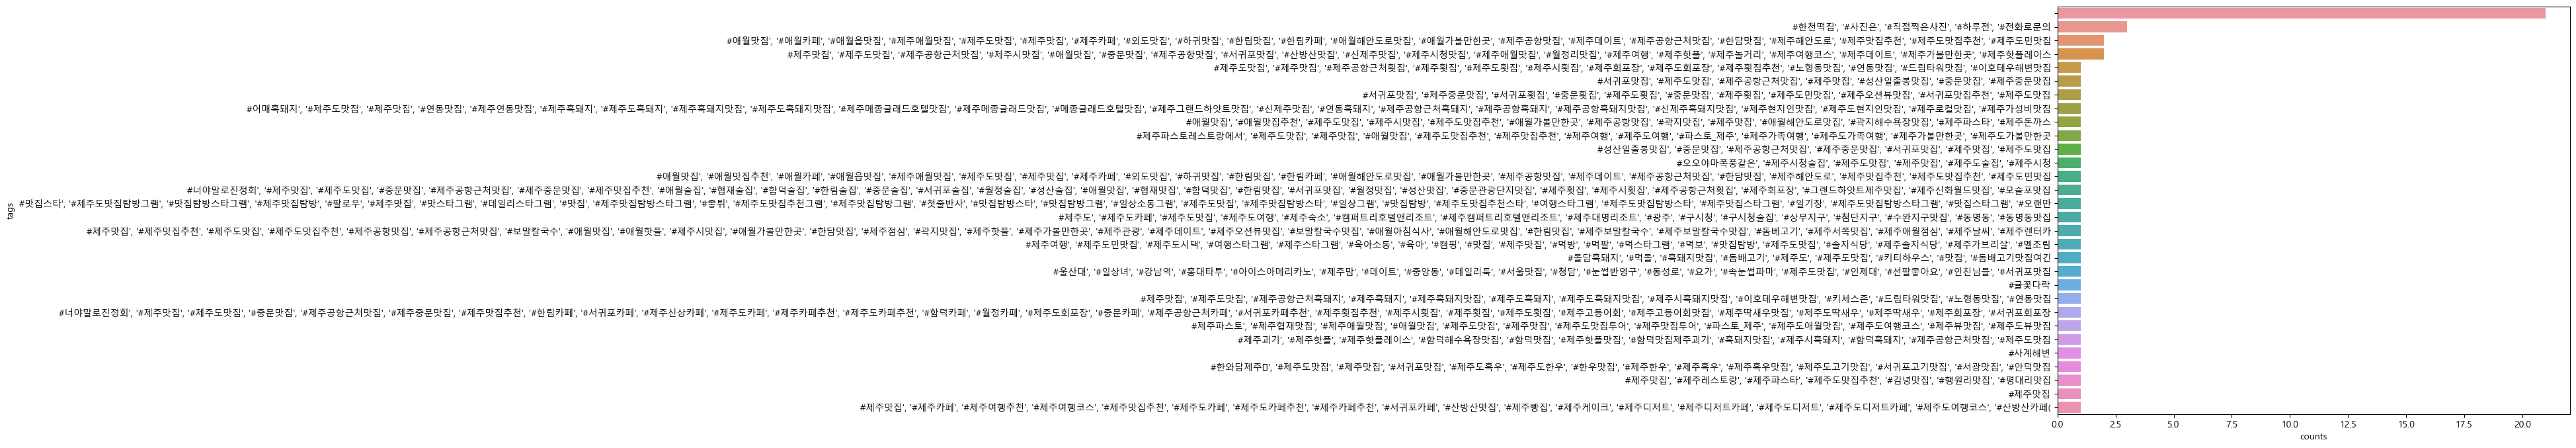

In [204]:
# 막대 차트 그리기
plt.figure(figsize=(10,8)) # 차트 이미지 크기 조정
sns.barplot(x='counts', y='tags', data = tag_counts_df)


In [205]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [206]:
# 워드 클라우드 라이브러리 호출
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [207]:
# 워드 클라우드에 필요한 글꼴 지정
if platform.system() == 'Windows': #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin": #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


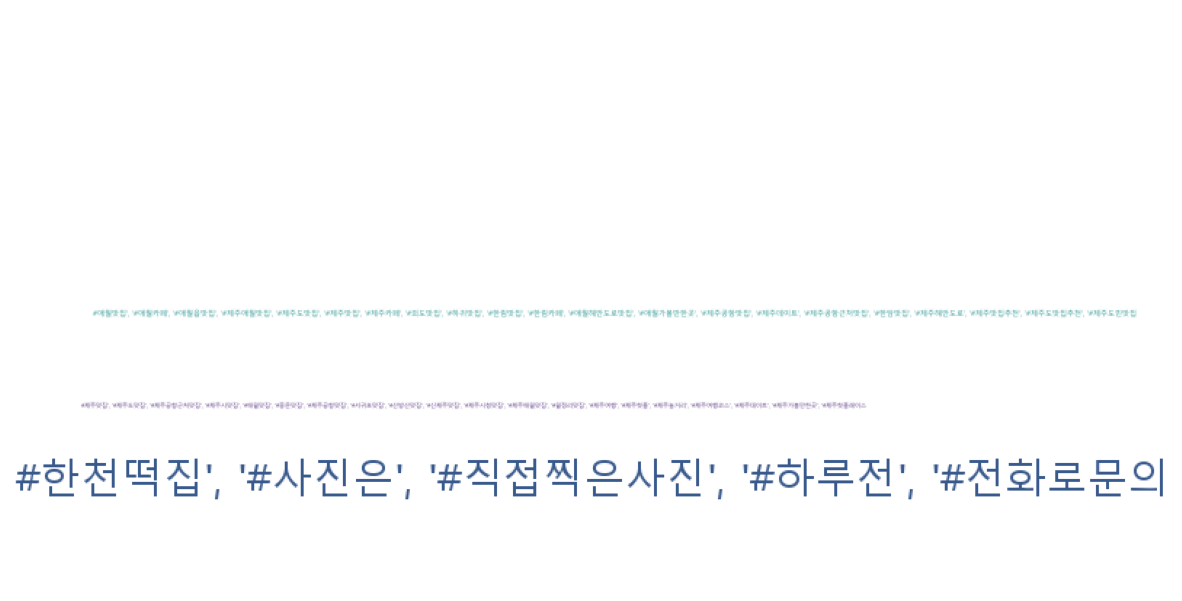

In [208]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path, # 사용할 글꼴 경로
                    background_color="white", # 배경색
                    max_words=50, # 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.5, # 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800, # 워드클라우드 가로
                    height = 400 # 워드클라우드 세로
                ).generate_from_frequencies(tag_counts_selected) 

plt.figure(figsize=(15,10)) # 최종 출력물의 크기
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../files/tag-wordcloud.png') 